**Ridge Regresyon**

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

In [12]:
db = pd.read_csv("./dataset01.csv")
db = db.dropna()
dms = pd.get_dummies(db[['League', 'Division','NewLeague']])
y = db["Salary"]
X_ = db.drop (['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.25,
                                                   random_state = 42)

In [13]:
db.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [14]:
db.shape

(263, 20)

In [15]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [16]:
ridge_model

Ridge(alpha=0.1)

In [17]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [18]:
ridge_model.intercept_

-4.578626905721649

In [19]:
lambdalar = 10**np.linspace(10,-2,100)*5

In [20]:
lambdalar

array([5.00000000e+10, 3.78231664e+10, 2.86118383e+10, 2.16438064e+10,
       1.63727458e+10, 1.23853818e+10, 9.36908711e+09, 7.08737081e+09,
       5.36133611e+09, 4.05565415e+09, 3.06795364e+09, 2.32079442e+09,
       1.75559587e+09, 1.32804389e+09, 1.00461650e+09, 7.59955541e+08,
       5.74878498e+08, 4.34874501e+08, 3.28966612e+08, 2.48851178e+08,
       1.88246790e+08, 1.42401793e+08, 1.07721735e+08, 8.14875417e+07,
       6.16423370e+07, 4.66301673e+07, 3.52740116e+07, 2.66834962e+07,
       2.01850863e+07, 1.52692775e+07, 1.15506485e+07, 8.73764200e+06,
       6.60970574e+06, 5.00000000e+06, 3.78231664e+06, 2.86118383e+06,
       2.16438064e+06, 1.63727458e+06, 1.23853818e+06, 9.36908711e+05,
       7.08737081e+05, 5.36133611e+05, 4.05565415e+05, 3.06795364e+05,
       2.32079442e+05, 1.75559587e+05, 1.32804389e+05, 1.00461650e+05,
       7.59955541e+04, 5.74878498e+04, 4.34874501e+04, 3.28966612e+04,
       2.48851178e+04, 1.88246790e+04, 1.42401793e+04, 1.07721735e+04,
      

In [24]:
ridge_model = Ridge()
katsayilar = []
for i in lambdalar:
    ridge_model.set_params(alpha= i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)

In [25]:
katsayilar

[array([ 1.14162299e-04,  3.76251403e-05,  5.83791845e-06,  1.99994238e-05,
         2.08187287e-05,  1.67826569e-05,  3.48945616e-06,  2.16801579e-03,
         6.36028968e-04,  7.44934078e-05,  3.32831541e-04,  3.21739790e-04,
         2.34397139e-04,  1.91886916e-04,  1.62757229e-05,  2.64619752e-07,
         2.68389758e-08, -1.51725980e-07,  3.71531662e-08]),
 array([ 1.50607525e-04,  4.96462410e-05,  7.69950377e-06,  2.63975288e-05,
         2.74561410e-05,  2.21384656e-05,  4.57268107e-06,  2.84451656e-03,
         8.34685604e-04,  9.78444691e-05,  4.36903601e-04,  4.22416995e-04,
         3.07663011e-04,  2.53415630e-04,  2.14661750e-05,  3.51724233e-07,
         3.53182711e-08, -2.00577983e-07,  4.88850973e-08]),
 array([ 1.98564494e-04,  6.54713547e-05,  1.01475684e-05,  3.48263246e-05,
         3.61837319e-05,  2.91846176e-05,  5.97581171e-06,  3.72340124e-03,
         1.09291519e-03,  1.28260040e-04,  5.72270333e-04,  5.53422214e-04,
         4.02940094e-04,  3.34574426e-04, 

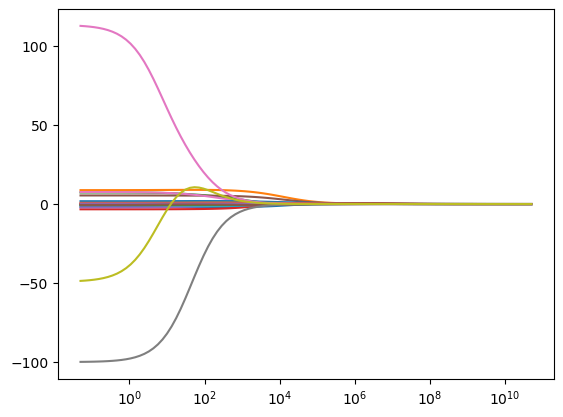

In [26]:
ax = plt.gca()
ax.plot(lambdalar, katsayilar)
ax.set_xscale("log")

In [27]:
ridge_model = Ridge().fit(X_train , y_train)

In [28]:
y_pred = ridge_model.predict(X_train)

In [29]:
y_pred[0:10]

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [31]:
y_train[0:10]

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [33]:
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
RMSE

289.34470696006565

In [35]:
y_pred = ridge_model.predict(X_test)

In [36]:
RMSE = RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

356.80829057302384